<a href="https://colab.research.google.com/github/dhanya-10/AIML-ALGORITHMS/blob/master/Build_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Dataset:
╒═══════════════════╤══════════╕
│   YearsExperience │   Salary │
╞═══════════════════╪══════════╡
│                 1 │    30000 │
├───────────────────┼──────────┤
│                 3 │    40000 │
├───────────────────┼──────────┤
│                 5 │    50000 │
├───────────────────┼──────────┤
│                 7 │    60000 │
├───────────────────┼──────────┤
│                 9 │    75000 │
├───────────────────┼──────────┤
│                11 │    90000 │
├───────────────────┼──────────┤
│                13 │   105000 │
├───────────────────┼──────────┤
│                15 │   120000 │
╘═══════════════════╧══════════╛
Actual vs Predicted Salaries on Test Data:
 YearsExperience  Actual Salary (₹)  Predicted Salary (₹)
               3              40000               38400.0
              11              90000               90800.0

Enter years of experience to predict salary: 44

Prediction for your input:
 Input YearsExperience  Predicted Salary (₹)
                

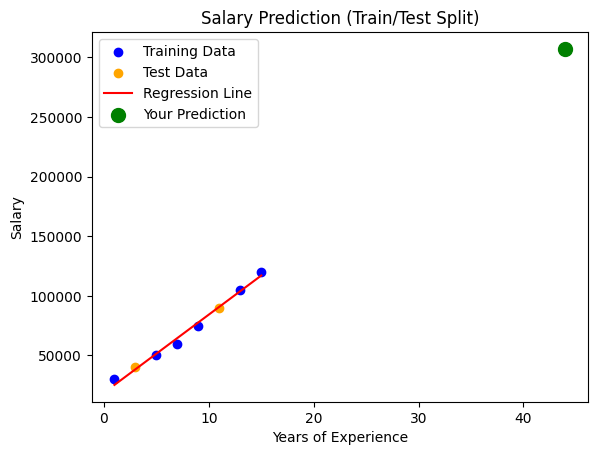

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tabulate import tabulate

# Example dataset
data = {
    "YearsExperience": [1, 3, 5, 7, 9, 11, 13, 15],
    "Salary": [30000, 40000, 50000, 60000, 75000, 90000, 105000, 120000]
}

df = pd.DataFrame(data)
print("Original Dataset:")
print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False))


# Features and target
X = df[["YearsExperience"]]
y = df["Salary"]

# Split into training (6 rows) and testing (2 rows)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict for test data
y_pred = model.predict(X_test)

# Create a DataFrame to display actual vs predicted
results_df = pd.DataFrame({
    "YearsExperience": X_test["YearsExperience"].values,
    "Actual Salary (₹)": y_test.values,
    "Predicted Salary (₹)": y_pred.round(2)
})

print("Actual vs Predicted Salaries on Test Data:")
print(results_df.to_string(index=False))

# Prompt user input for custom years of experience
custom_years = float(input("\nEnter years of experience to predict salary: "))
custom_salary = model.predict(pd.DataFrame([[custom_years]], columns=["YearsExperience"]))[0]
# Create a DataFrame for the custom input and prediction
custom_df = pd.DataFrame({
    "Input YearsExperience": [custom_years],
    "Predicted Salary (₹)": [round(custom_salary, 2)]
})

print("\nPrediction for your input:")
print(custom_df.to_string(index=False))

# Plot training data, test data, and regression line
plt.scatter(X_train, y_train, color='blue', label="Training Data")
plt.scatter(X_test, y_test, color='orange', label="Test Data")
plt.plot(X, model.predict(X), color='red', label="Regression Line")
plt.scatter(custom_years, custom_salary, color='green', s=100, label="Your Prediction")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary Prediction (Train/Test Split)")
plt.legend()
plt.show()
